|Name|examnr.|
|----|-------|
|Deirdre Folan|2011440|
|Luis Batalha|2016399|

# Research Question

How does recycling behaviour differ across the Netherlands according to municiplaity size and province? Do provinces that recycle more also tweet more about the environment?


# Motivation - Why is Recycling Important and What Does it Have to do With Twitter?

In recent decades we have seen an explosion of the world population coupled with massive increases in industrialisation which has pushed our planet to its very limits. Climate change, degradation of soils and ecosystems, and decreases in biodiversity have become a major concern and it has become widely accepted that, at current rates of population growth and consumption, our environment as we know it will soon be unable to sustain life as it has done in the past. In response to this, governments have been heavily promoting and investing in the three R's framework, reduce, reuse, and recycle. This framework aims to create norms in society where one does not waste valuable goods or materials and limits the impacts of economic development on non-renewable resources [source:Grosse,2010](https://journals.openedition.org/sapiens/906) 

So we can see that recycling is becoming an increasingly important issue in society. As concerns for our environment grow and the threat of global warming increases much research has pointed towards poor waste management as a cause of environmental damage and a producer of harmful gases. Although significant efforts have been made to reduce volumes of waste in recent decades, The Netherlands still produces significantly more waste per person than the OECD average, in 2015, Dutch citizens produced approximately 43kg more waste each than their OECD counterparts (see this [graph](https://data.oecd.org/waste/municipal-waste.htm) for details). As existing landfill sites are reaching capacity and space for new ones is limited, it is widely accepted that the best option for the future is recycling as much as possible in order to reduce the proportion of waste that ends op in landfill sites and reducing waste in general. Reducing waste and increasing levels of recycling can help to slow down damage to the environment and improve quality of life for both humans and nature.
As establishing good recycling practices among the population is an important step in ensuring sustainable development we decided to see if this behaviour differs across the Netherlands. We measured the differences in behaviour by municipality size and province as perhaps this could expose some pattern that could be useful in ensuring good outcomes nationwide.

Twitter is a popular online platform for both personal expression and advertising which had approximately 0.87 million daily active users in the Netherlands in 2017 (see [here](https://www.statista.com/statistics/639790/social-media-active-user-penetration-in-the-netherlands-by-social-network/) for details) this means it is a powerful tool for imfluencing public opinion and behaviour. Much [research](http://www.tandfonline.com/doi/abs/10.1080/13504620220145401) has pointed towards social norms and morality as two of the main motivators for recycling behaviour. Therefore it seems likely that Twitter can influence how people think about recycling and their recycling behaviour. For our analysis, we decided to look at the provinces who had the best and worst scores and see how often people in those provinces tweet about sustainability to see if there really is any kind of relationship between tweeting about the environment and actually taking action to prevent damage to it. 


# Method

For the first part of our analysis we used data from [Telos](http://www.telos.nl/default.aspx), the Brabant centre for sustainable development. The organisation is mainly focused on researching sustainability in the region as its economy grows and making sure the region stays on track to achieving a range of environmental goals set by the [Brabant Manifest](https://www.brabant.nl/-/media/1a3c16857da74e699993d6ff640779c1.pdf). 
We used an indicator developed by Telos called 'resources and waste' which assigns a score to each municipality based on waste management and recycling levels in that municipality. A higher score indicates that the municipality is doing well and vice versa. We calculated the mean and median scores by size and province and did a kruskal-wallis test to check whether the sample originated from the same distribution or not. 
 
Next we mined data from Twitter in the Netherlands and searched for keyword 'duurzaamheid', the dutch for 'sustainability'. In order to mine data from Twitter, we first created a developer app in Twitter API. Then, we chose the Netherlands by inserting the country's Where On Earth ID. This presented us with the trending topics for the Netherlands over the past few days. We then filtered the trending topics by the keyword 'duurzaamheid'. We then used a counter to aggregate the amount of times the keyword was used in each of the top 20 locations. As these locations are self-reported by users this data was quite noisy and difficult to manipulate e.g. 'Nederland' and 'The Netherlands' were recorded seperately. As a result of this we decided to copy the data into an excel file, remove duplicate locations, and add the province name to each row. We then uploaded the file as a pandas dataframe and calculated the total number of tweets by province. Finally compared this to the mean score by province on the resources and waste indicator.

# Results

When comparing the mean score on the resources and waste indicator we found that small towns performed best while large towns performed the worst, as can be seen in the graph below. When calculating the median scores we found that they varied from 50.9 for small municipalities to 42.5 for large towns. We can see in the next graph that, when the municipalities are divided by province and the means are calculated, Limburg and Gelderland perform the best, closely followed by Overijssel and Noord-Brabant. The two worst-performing provinces are Noord-Holland and Zuid-Holland. Using a kruskal-wallis test we established that the scores for small, medium, and large towns are statistically significantly different from each other.  
After mining the data from Twitter we can see that  our key word was mentioned 261 times during the time period. We can also see that it was used as a hashtag 102 times (in two different forms). We can also see that when talking about sustainability, users often hashtag related terms such as 'EZEnergyAward', 'innovation', 'government', and 'economy'. Finally, by looking at the regions with a high volume of tweets e.g. Noord-Holland and looking at the graph of mean scores by provence, we can see that there seems to be no relationship between resources and waste scores and tweet volumes. 

In [56]:
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
import numpy as np

In [57]:
from scipy import stats


Below we import the Excel file as a pandas datafram and then print it to get a look at the data. Municipality size is recorded as 3 seperate dummy variables. In order to calculate the means and mediums for each size we need to get rid of the dummmy variables and organise the data by municipality size.

In [186]:
df=pd.read_excel(r"C:\Users\DFOLA_000\Downloads\SustainabilityScoresPython.xlsx", index_col=0, sep = ';')

In [187]:
type(df)

pandas.core.frame.DataFrame

In [188]:
print(df)

                      municipality  Small  Medium  Large  resources_waste  \
province                                                                    
Drenthe                Aa en Hunze      1       0      0             48.4   
Noord-Brabant              Aalburg      1       0      0             56.2   
Noord-Holland             Aalsmeer      1       0      0             51.2   
Gelderland                  Aalten      1       0      0             61.2   
Friesland            Achtkarspelen      1       0      0             45.6   
Zuid-Holland          Alblasserdam      1       0      0             35.4   
Zuid-Holland         Albrandswaard      1       0      0             43.2   
Noord-Holland              Alkmaar      0       0      1             42.5   
Overijssel                  Almelo      0       1      0             44.7   
Flevoland                   Almere      0       0      1             49.9   
Zuid-Holland   Alphen aan den Rijn      0       0      1             37.6   

In [189]:
print(df.head())

                municipality  Small  Medium  Large  resources_waste  \
province                                                              
Drenthe          Aa en Hunze      1       0      0             48.4   
Noord-Brabant        Aalburg      1       0      0             56.2   
Noord-Holland       Aalsmeer      1       0      0             51.2   
Gelderland            Aalten      1       0      0             61.2   
Friesland      Achtkarspelen      1       0      0             45.6   

              province_duplicate  
province                          
Drenthe                  Drenthe  
Noord-Brabant      Noord-Brabant  
Noord-Holland      Noord-Holland  
Gelderland            Gelderland  
Friesland              Friesland  


In [190]:
#Creating three new columns one for each size which will contain text instead of the dummy variables which can then be combined into a single column
df['Size1'] = np.where(df['Small']==1, 'small', '')

In [191]:
print(df.head())

                municipality  Small  Medium  Large  resources_waste  \
province                                                              
Drenthe          Aa en Hunze      1       0      0             48.4   
Noord-Brabant        Aalburg      1       0      0             56.2   
Noord-Holland       Aalsmeer      1       0      0             51.2   
Gelderland            Aalten      1       0      0             61.2   
Friesland      Achtkarspelen      1       0      0             45.6   

              province_duplicate  Size1  
province                                 
Drenthe                  Drenthe  small  
Noord-Brabant      Noord-Brabant  small  
Noord-Holland      Noord-Holland  small  
Gelderland            Gelderland  small  
Friesland              Friesland  small  


In [192]:
df['Size2'] = np.where(df['Medium']==1, 'medium', '')

In [193]:
df['Size3'] = np.where(df['Large']==1, 'large', '')

In [194]:
print(df.head())

                municipality  Small  Medium  Large  resources_waste  \
province                                                              
Drenthe          Aa en Hunze      1       0      0             48.4   
Noord-Brabant        Aalburg      1       0      0             56.2   
Noord-Holland       Aalsmeer      1       0      0             51.2   
Gelderland            Aalten      1       0      0             61.2   
Friesland      Achtkarspelen      1       0      0             45.6   

              province_duplicate  Size1 Size2 Size3  
province                                             
Drenthe                  Drenthe  small              
Noord-Brabant      Noord-Brabant  small              
Noord-Holland      Noord-Holland  small              
Gelderland            Gelderland  small              
Friesland              Friesland  small              


In [195]:
#Replacing the emply cells in size1 with the filled cells from size2.
df = df.replace('', np.nan)

df.Size1 = df.Size1.fillna(df.Size2)

In [196]:
#As above, we fill the empty cells in size1 with the filled cells from size3.
df.Size1 = df.Size1.fillna(df.Size3)

In [197]:
#Deleting size2 and size3 as their content has now been copied into size1.
df.drop(['Size2'], axis = 1, inplace = True)
df.drop(['Size3'], axis = 1, inplace = True)


In [198]:
#Deleting the three columns which contained the dummy variables as they are no longer useful.
df.drop(['Small'], axis = 1, inplace = True)
df.drop(['Medium'], axis = 1, inplace = True)
df.drop(['Large'], axis = 1, inplace = True)
print(df.head())

                municipality  resources_waste province_duplicate  Size1
province                                                               
Drenthe          Aa en Hunze             48.4            Drenthe  small
Noord-Brabant        Aalburg             56.2      Noord-Brabant  small
Noord-Holland       Aalsmeer             51.2      Noord-Holland  small
Gelderland            Aalten             61.2         Gelderland  small
Friesland      Achtkarspelen             45.6          Friesland  small


In [199]:
#Creating three new dataframes for each municipality size in order to calculate the mean and median scores
small_mun = df[df.Size1 == 'small']

In [200]:
print(small_mun.head())

                municipality  resources_waste province_duplicate  Size1
province                                                               
Drenthe          Aa en Hunze             48.4            Drenthe  small
Noord-Brabant        Aalburg             56.2      Noord-Brabant  small
Noord-Holland       Aalsmeer             51.2      Noord-Holland  small
Gelderland            Aalten             61.2         Gelderland  small
Friesland      Achtkarspelen             45.6          Friesland  small


In [201]:
medium_mun = df[df.Size1 == 'medium']
print(medium_mun.head())

                 municipality  resources_waste province_duplicate   Size1
province                                                                 
Overijssel             Almelo             44.7         Overijssel  medium
Noord-Holland      Amstelveen             46.8      Noord-Holland  medium
Drenthe                 Assen             48.7            Drenthe  medium
Gelderland          Barneveld             46.8         Gelderland  medium
Noord-Brabant  Bergen op Zoom             49.7      Noord-Brabant  medium


In [202]:
large_mun = df[df.Size1 == 'large']
print(large_mun.head())

                      municipality  resources_waste province_duplicate  Size1
province                                                                     
Noord-Holland              Alkmaar             42.5      Noord-Holland  large
Flevoland                   Almere             49.9          Flevoland  large
Zuid-Holland   Alphen aan den Rijn             37.6       Zuid-Holland  large
Utrecht                 Amersfoort             38.8            Utrecht  large
Noord-Holland            Amsterdam             30.6      Noord-Holland  large


In [203]:
#Calculating the mean scores for small, medium, and large municipalities.
small_mean = small_mun.mean(axis=None, skipna=None, level=None, numeric_only=None)

In [204]:
print(small_mean)

resources_waste    50.683172
dtype: float64


In [205]:
medium_mean = medium_mun.mean(axis=None, skipna=None, level=None, numeric_only=None)
print(medium_mean)

resources_waste    48.70625
dtype: float64


In [206]:
large_mean = large_mun.mean(axis=None, skipna=None, level=None, numeric_only=None)
print(large_mean)

resources_waste    45.03871
dtype: float64


In [207]:
#Creating a dictionary of the three means and plotting them as a histogram.
d = {"small":50.677542, "medium":48.70625, "large":45.03871}

In [208]:
import matplotlib.pyplot as plt

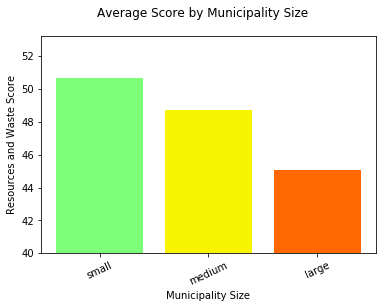

In [209]:

jet = plt.get_cmap('jet')
N = len(d)
plt.bar(range(N), d.values(), align='center', color=jet(np.linspace(0.5, .8, N)))
plt.xticks(range(N), d.keys(), rotation=25)
plt.ylabel('Resources and Waste Score')
plt.xlabel('Municipality Size')
plt.suptitle('Average Score by Municipality Size')
plt.ylim(ymin=40)
plt.show()

We can see from the graph that the average score for small towns was the highest, and the average score for large towns was the lowest. We can conduct a kruskal wallis test to check if the differences between the median scores for small, medium, and large towns are statistically significant.

In [210]:
#Calculating the median scores for each size and conducting the kruskal wallis test
large_mun['resources_waste'].median()

42.5

In [211]:
medium_mun['resources_waste'].median()

48.2

In [212]:
small_mun['resources_waste'].median()

50.9

In [219]:
H, pval = stats.kruskal(small_mun['resources_waste'], medium_mun['resources_waste'], large_mun['resources_waste'])


print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between resources and waste scores for small, medium and large municipalities.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between resources and waste scores for small, medium and large municipalities.")

H-statistic: 10.2514794022
P-Value: 0.00594182055919
Reject NULL hypothesis - Significant differences exist between resources and waste scores for small, medium and large municipalities.


In [119]:
df["resources_waste"].groupby(df["province_duplicate"]).agg(["mean"])

,mean
province_duplicate,
Drenthe,50.316667
Flevoland,43.616667
Friesland,47.629167
Gelderland,57.698148
Groningen,51.890476
Limburg,57.963636
Noord-Brabant,55.296875
Noord-Holland,41.868750
Overijssel,56.212000


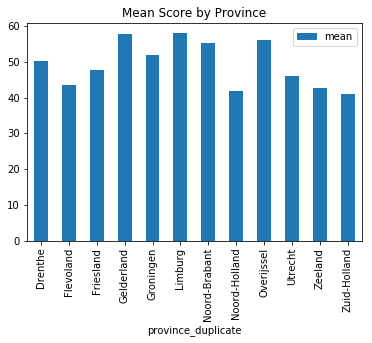

In [167]:
#Grouping the data by province and then calculating and graphing the means to see which provinces perform the best and worst.
df["resources_waste"].groupby(df["province_duplicate"]).agg(["mean"]).plot(kind = 'bar', title='Mean Score by Province')

plt.show()                                                                         

We can see from the graph that Limburg and Gelderland perform the best, closely followed by Overijssel and Noord-Brabant. The two worst-performing provinces are Noord-Holland and Zuid-Holland. Next we import data from twitter:

In [88]:
import numpy as np
import pandas as pd 
import plotly.plotly as py
import plotly.tools as tls

In [90]:
import json

In [94]:
import twitter

In [95]:
#Entering authentication codes for the twitter api in order to access Twitter
CONSUMER_KEY = ''
CONSUMER_SECRET =''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print (twitter_api)

In [96]:
#Searching for trending topics in the Netherlands
NL_WOE_ID = (23424909)

nl_trends = twitter_api.trends.place(_id=NL_WOE_ID)

print (nl_trends)

[{'trends': [{'name': '#jinek', 'url': 'http://twitter.com/search?q=%23jinek', 'promoted_content': None, 'query': '%23jinek', 'tweet_volume': None}, {'name': '#mrfrankvisser', 'url': 'http://twitter.com/search?q=%23mrfrankvisser', 'promoted_content': None, 'query': '%23mrfrankvisser', 'tweet_volume': None}, {'name': '#debalie', 'url': 'http://twitter.com/search?q=%23debalie', 'promoted_content': None, 'query': '%23debalie', 'tweet_volume': None}, {'name': '#rtllatenight', 'url': 'http://twitter.com/search?q=%23rtllatenight', 'promoted_content': None, 'query': '%23rtllatenight', 'tweet_volume': None}, {'name': '#radar', 'url': 'http://twitter.com/search?q=%23radar', 'promoted_content': None, 'query': '%23radar', 'tweet_volume': None}, {'name': 'Jong PSV', 'url': 'http://twitter.com/search?q=%22Jong+PSV%22', 'promoted_content': None, 'query': '%22Jong+PSV%22', 'tweet_volume': None}, {'name': 'Turken of Marokkanen', 'url': 'http://twitter.com/search?q=%22Turken+of+Marokkanen%22', 'promote

In [97]:
from urllib.parse import unquote


In [98]:
import json

#Printing a more readable version of the lists of trends and we sort each trend by using the option True in sort_keys


print (json.dumps(nl_trends, indent=1, sort_keys=True))

[
 {
  "as_of": "2018-01-29T23:19:45Z",
  "created_at": "2018-01-29T23:12:24Z",
  "locations": [
   {
    "name": "Netherlands",
    "woeid": 23424909
   }
  ],
  "trends": [
   {
    "name": "#jinek",
    "promoted_content": null,
    "query": "%23jinek",
    "tweet_volume": null,
    "url": "http://twitter.com/search?q=%23jinek"
   },
   {
    "name": "#mrfrankvisser",
    "promoted_content": null,
    "query": "%23mrfrankvisser",
    "tweet_volume": null,
    "url": "http://twitter.com/search?q=%23mrfrankvisser"
   },
   {
    "name": "#debalie",
    "promoted_content": null,
    "query": "%23debalie",
    "tweet_volume": null,
    "url": "http://twitter.com/search?q=%23debalie"
   },
   {
    "name": "#rtllatenight",
    "promoted_content": null,
    "query": "%23rtllatenight",
    "tweet_volume": null,
    "url": "http://twitter.com/search?q=%23rtllatenight"
   },
   {
    "name": "#radar",
    "promoted_content": null,
    "query": "%23radar",
    "tweet_volume": null,
    "url":

In [99]:
#We decided to search Twitter for use of the word 'duurzaamheid' which translates to 'sustainability' in english,
q =('duurzaamheid')

count = 100

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

# We set a loop with the aim foriterate through 5 more batches of results by following the cursor

for _ in range(5):
    print ("Length of statuses"), len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Creating a dictionary from next_results
    
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Showing a sample search results to make sure we are on the right track. 

print (json.dumps(statuses[0], indent=1))

Length of statuses
Length of statuses
Length of statuses
Length of statuses
Length of statuses
{
 "created_at": "Mon Jan 29 22:45:56 +0000 2018",
 "id": 958108978969567232,
 "id_str": "958108978969567232",
 "text": "RT @TkmstBehendig: Hogeschoolstudenten opgelet! Ben je ge\u00efnteresseerd in #duurzaamheid, meld je dan voor 5 februari aan voor de afstudeerex\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "duurzaamheid",
    "indices": [
     73,
     86
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "TkmstBehendig",
    "name": "ToekomstBehendig.nl",
    "id": 748460088495607808,
    "id_str": "748460088495607808",
    "indices": [
     3,
     17
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "nl",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_re

Above we can see a sample tweet that contains our keyword 'duurzaamheid' from the 29th of January 2018. We can also see the users id and screenname as well as the language used and the location among other details.

In [101]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each

print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1))
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(words[0:5], indent=1))

[
 "RT @TkmstBehendig: Hogeschoolstudenten opgelet! Ben je ge\u00efnteresseerd in #duurzaamheid, meld je dan voor 5 februari aan voor de afstudeerex\u2026",
 "RT @RabobankEH: #Klimaatverandering: van vijf over twaalf naar vijf voor twaalf. Volgens Reinier van den Berg, oud weerman van #RTL4, is da\u2026",
 "@RitadeJoode @GemGeldermalsen Een wijs besluit gewenst. #duurzaamheid",
 "RT @BAMWonen: Duurzaamheid geeft een stevige impuls aan de bouwproductie: Een mooie weergave via @refdag van een goed en waardevol paneldeb\u2026",
 "RT @harryvanrooijen: Meeting met projecttrekkers en gedeputeerde Anne-Marie Spierings om kansrijk project Veghel Win(d)t de wind in de zeil\u2026"
]
[
 "TkmstBehendig",
 "RabobankEH",
 "RitadeJoode",
 "GemGeldermalsen",
 "BAMWonen"
]
[
 "duurzaamheid",
 "Klimaatverandering",
 "RTL4",
 "duurzaamheid",
 "snelfietsroute"
]
[
 "RT",
 "@TkmstBehendig:",
 "Hogeschoolstudenten",
 "opgelet!",
 "Ben"
]


In [102]:
#Here we import a counter and use it to count how many times each of the most common words were mentioned.
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print (c.most_common()[:20]) # top 10
    print

[('RT', 335), ('de', 275), ('van', 271), ('en', 239), ('in', 226), ('voor', 158), ('een', 152), ('het', 149), ('duurzaamheid', 138), ('op', 105), ('is', 101), ('over', 90), ('met', 90), ('#duurzaamheid', 62), ('Duurzaamheid', 61), ('dat', 59), ('hand', 58), ('aan', 52), ('je', 50), ('De', 44)]
[('Stadsbeheer050', 29), ('H2Centrum', 29), ('joostvankeulen', 28), ('janrotmans', 18), ('ARakhorst', 12), ('LUX_Nijmegen', 11), ('mkbnl', 9), ('andrehoogendijk', 9), ('odijmond', 9), ('nicothenu', 9), ('oneworldnl', 9), ('TkmstBehendig', 8), ('tvanelferen', 8), ('BREEAMnl', 7), ('TrouwGroen', 7), ('dzh', 7), ('rotterdam', 7), ('exxonmobil', 7), ('D66Nijmegen', 6), ('gemhofvantwente', 6)]
[('duurzaamheid', 92), ('Shell', 12), ('Duurzaamheid', 10), ('EZKEnergyAward', 8), ('innovatie', 8), ('Kloosterboer', 7), ('outstanding', 7), ('SDGs', 7), ('NAM', 7), ('overheid', 7), ('3bwonen', 6), ('kansenvooriedereen', 6), ('circulaire', 6), ('economie', 6), ('tomaat', 6), ('burgers', 6), ('Doemee', 6), ('GR

In [103]:
#we can organise this data into tables using PrettyTable
from prettytable import PrettyTable
import datetime 
import requests

In [120]:
for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:15] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print (pt)

+---------------+-------+
| Word          | Count |
+---------------+-------+
| RT            |   335 |
| de            |   275 |
| van           |   271 |
| en            |   239 |
| in            |   226 |
| voor          |   158 |
| een           |   152 |
| het           |   149 |
| duurzaamheid  |   138 |
| op            |   105 |
| is            |   101 |
| over          |    90 |
| met           |    90 |
| #duurzaamheid |    62 |
| Duurzaamheid  |    61 |
+---------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| Stadsbeheer050  |    29 |
| H2Centrum       |    29 |
| joostvankeulen  |    28 |
| janrotmans      |    18 |
| ARakhorst       |    12 |
| LUX_Nijmegen    |    11 |
| mkbnl           |     9 |
| andrehoogendijk |     9 |
| odijmond        |     9 |
| nicothenu       |     9 |
| oneworldnl      |     9 |
| TkmstBehendig   |     8 |
| tvanelferen     |     8 |
| BREEAMnl        |     7 |
| TrouwGroen      |     7 |
+-

Above we  can see that our key word was mentioned 261 times during the time period (in three different times as seen in the first table). In the bottom table we can also see that it was used as a hashtag 102 times (in two different forms). We can also see that when talking about sustainability, users often hashtag related terms such as 'EZEnergyAward', 'Innovation', 'government', and 'economy'.

In [105]:
print (type(nl_trends))

<class 'twitter.api.TwitterListResponse'>


In [106]:
def store(tweet):
    print(json.dumps(tweet))

In [107]:
#Collecting the top 20 locations of the relevant tweets and counting how many times each one is reported.
locations = [status['user']['location'] for status in statuses]
counter = Counter(locations)
print("Location, Amount")
for (a, b) in counter.most_common()[:20]:
    print("{}, {}".format(a,b))

Location, Amount
, 119
Nederland, 25
Amsterdam, 23
Nijmegen, 18
Netherlands, 12
Den Haag, 12
Amsterdam, Nederland, 11
Rotterdam, 10
The Netherlands, 8
Groningen, 8
Amsterdam, The Netherlands, 8
Waalre, 7
Arnhem, 6
Den Haag, Nederland, 5
Beverwijk, 5
Wageningen, 5
Utrecht, 5
Utrecht, Nederland, 4
Hengelo, 4
Amersfoort, 4


The nature of this data made it difficult to process so we copied it into excel and added the province for each one and then uploaded it is a pandas dataframe.

In [135]:
city_data=pd.read_excel(r"C:\Users\DFOLA_000\Desktop\citydata.xlsx", index_col=0, sep = ';')

In [136]:
city_data

,Frequency,province,province_2
city,,,
Amsterdam,40,noord-holland,noord-holland
Rotterdam,15,zuid-holland,zuid-holland
Den Haag,16,zuid-holland,zuid-holland
Groningen,7,groningen,groningen
Nijmegen,7,gelderland,gelderland
Waalre,7,noord-brabant,noord-brabant
Amersfoort,6,utrecht,utrecht
Beverwijk,5,noord-holland,noord-holland
Wageningen,5,gelderland,gelderland


We then sorted the dataframe by province and calculated total number of relevant tweets in each province

In [146]:
city_data["Frequency"].groupby(city_data["province_2"]).agg(["sum"])

,sum
province_2,
gelderland,16
groningen,7
noord-brabant,7
noord-holland,45
overijssel,4
utrecht,15
zuid-holland,31


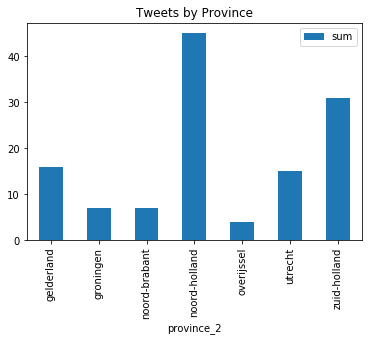

In [172]:
city_data["Frequency"].groupby(city_data["province_2"]).agg(["sum"]).plot(kind = 'bar', title='Tweets by Province')
plt.show()

We can see in the bar chart above that Noord-Holland had the most Tweets (45) followed by Zuid-Holland (31).

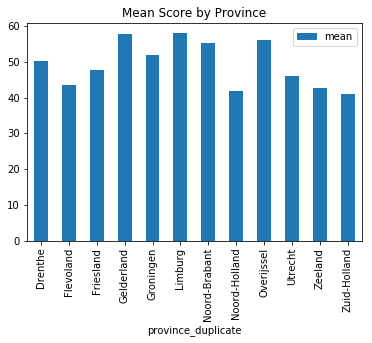

In [173]:
#Reproducing the earlier chart which showed mean scores by province.
df["resources_waste"].groupby(df["province_duplicate"]).agg(["mean"]).plot(kind = 'bar', title='Mean Score by Province')

plt.show()

We can compare the two charts above to see if there is any relationship between Twitter activity using the word 'sustainability' and mean scores on the resources and waste inidcator. For the top scoring province in resources and waste, Limburg, there were no relevant tweets while the worst-scoring province, Noord-Holland actually saw the highest number of Tweets on the topic. 